# Project 1 - Blog Post : Exploring Stack Overflow Data 2017 

# CRISP-DM Framework

**Business Understanding**: 

We want to explore Stack Overflow 2017 data to better understand following business questions:

1. Description of the respondents, where they are and who they are?
2. What are the top known languages, the top wanted languages among professional developers and students?
3. Is the developer’s salary related to their country, language type, degree and working period?
4. A tempt of using linear regression and random forest to test whether StackOverFlow activity level could affect salary.

**Data Understanding** 

The dataset is about a survey provided by StackOverFlow in 2017, contains 2 files: A question list and related anwsers from developers. There are 51392 responders and each has answered 153 questions. We could see most of the responders are from English-speaking Contries like US, India, EU, etc..

**Data preparation** & **Data Modeling**: 

We needs to pick up relative data in purpose, so for each use case, we did data cleaning, NAN value dropout, biased data remving and relative column picking for data modelling to make sure our conclusion trustable and clear.

**Result Evaluation & Deployment**: 

Result and discussion are published in https://medium.com/@eros329/stackoverflow2017-schema-exploration-b6f935b7d3cd

# Data Understanding

In order to get a better understanding of the data, let's take a look at some of the characteristics of the dataset.

In [208]:
# importing the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

!python --version

Python 3.9.13


In [5]:
# importing data
df_public = pd.read_csv('survey_results_public_2017.csv')
df_schema = pd.read_csv('survey_results_schema_2017.csv')
df_public.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


Here we could see the program is about a survey provided by StackOverFlow in 2017, contains 2 files: 
A question list and related anwsers from developers

In [62]:
## Look at the data
print('There are {} responders'.format(df_public.shape[0]), 'and each has answered {} questions'.format(df_public.shape[1]-1))

There are 51392 responders and each has answered 153 questions


In [10]:
df_public.count()

Respondent              51392
Professional            51392
ProgramHobby            51392
Country                 51392
University              51392
                        ...  
QuestionsInteresting    34536
QuestionsConfusing      34419
InterestedAnswers       34612
Salary                  12891
ExpectedSalary           2566
Length: 154, dtype: int64

We could see missing data existing, most of the responders not fill in the ExpectedSalary 

# Data preparation & Data Modeling

## 1. Description of the respondents, where they are and who they are?

In [11]:
print('There are {} different countries'.format(df_public['Country'].nunique()))

There are 201 different countries


In [12]:
#what they are
sorted(df_public['Country'].unique())

['Afghanistan',
 'Aland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaidjan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guyana',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibra

In [218]:
#whats the top 20 countries responders coming from
top20=df_public['Country'].value_counts().head(20)
top20

United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Name: Country, dtype: int64

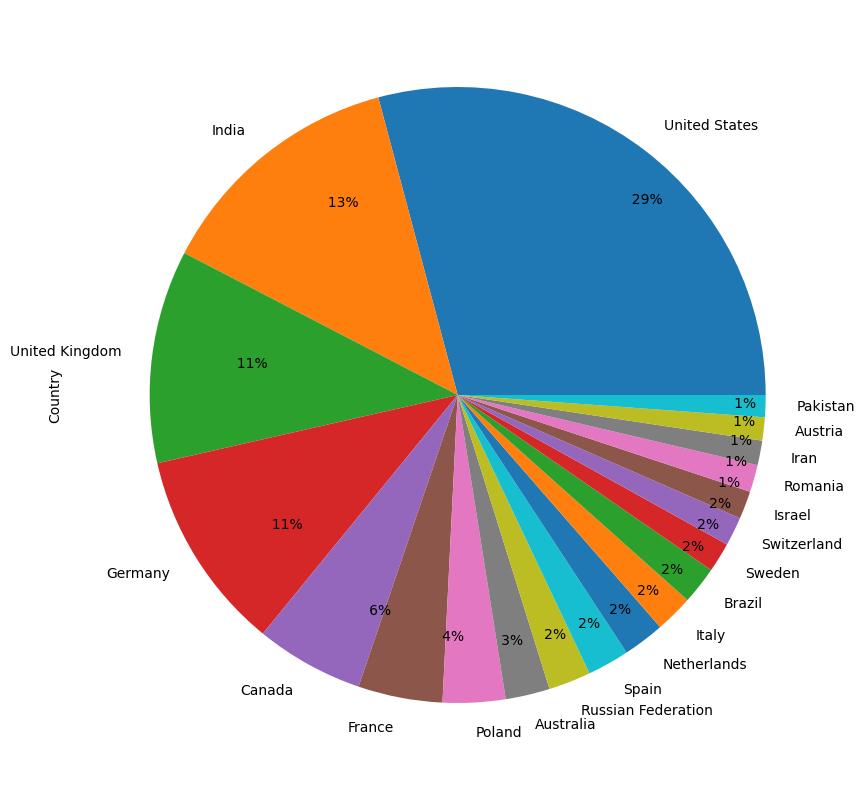

In [15]:
#pie charm
top20.plot(kind='pie',figsize=(10,10), autopct='%20.0f%%',pctdistance=0.8);

We could see most of the responders are from English-speaking Contries like US, India, EU, etc..

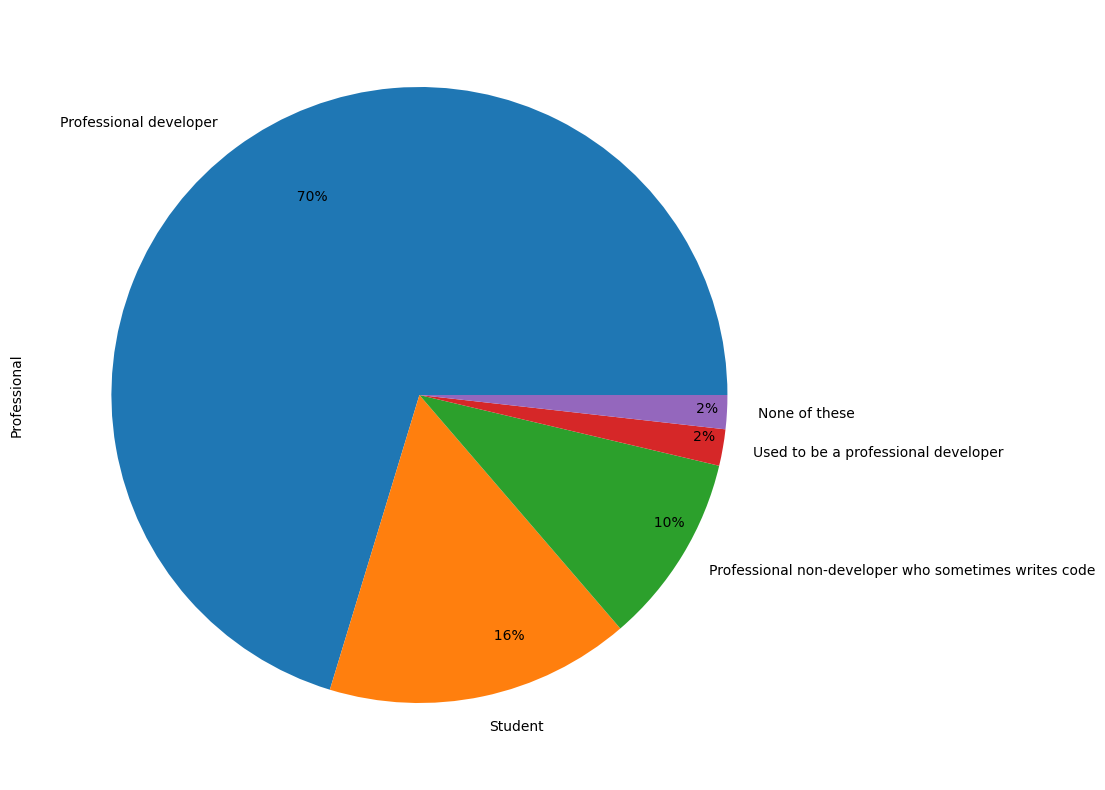

In [16]:
# Check the ratio of different professionals
df_public["Professional"].value_counts().plot(kind='pie',figsize=(10,10), autopct='%20.0f%%',pctdistance=0.8);

We could see most of the responders are developer and student in StackOverFlow and also some code-writing colleagues 

## 2. What are the top known languages, top wanted languages among the professional developers and students?

In [75]:
# create a data frame with only Professional developers
df_dev = df_public[df_public["Professional"] == "Professional developer"] 
df_dev.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [76]:
# look at the Which of the following languages are used in the development"
df_dev["HaveWorkedLanguage"].value_counts() 

C#; JavaScript; SQL                                             1211
JavaScript; PHP; SQL                                             983
Java                                                             685
JavaScript                                                       619
Java; JavaScript; SQL                                            596
                                                                ... 
C#; Common Lisp; Haskell; Java; JavaScript; PHP; Python; SQL       1
C; C++; C#; JavaScript; Objective-C; PHP                           1
Assembly; C; C++; C#; Java; JavaScript                             1
C++; C#; Go; Java; JavaScript; Python; Ruby; SQL                   1
C++; C#; Perl; Ruby; SQL; VB.NET; VBA                              1
Name: HaveWorkedLanguage, Length: 6472, dtype: int64

In [77]:
# check how many null values
df_dev["HaveWorkedLanguage"].isnull().sum() 

8692

In [78]:
# drop rows with missing values
df_work = df_dev["HaveWorkedLanguage"].dropna(axis=0)
df_work

2                                        Java; PHP; Python
7        CoffeeScript; Clojure; Elixir; Erlang; Haskell...
8                                           C#; JavaScript
9                                       Objective-C; Swift
13                             Java; JavaScript; Ruby; SQL
                               ...                        
51383             JavaScript; Objective-C; PHP; SQL; Swift
51384                                           JavaScript
51386                  C++; C#; Java; JavaScript; PHP; SQL
51387             C#; JavaScript; Python; SQL; VB.NET; VBA
51390                               JavaScript; PHP; Swift
Name: HaveWorkedLanguage, Length: 27439, dtype: object

In [79]:
# split the multiple languages for each respondent and create list of languages
def split_and_append(df_work):
    ind_languages = []
    for langs in df_work:
        if ';' in langs:
            temp_list = langs.split('; ')
            ind_languages += temp_list
        else:
            ind_languages.append(langs)
    return ind_languages

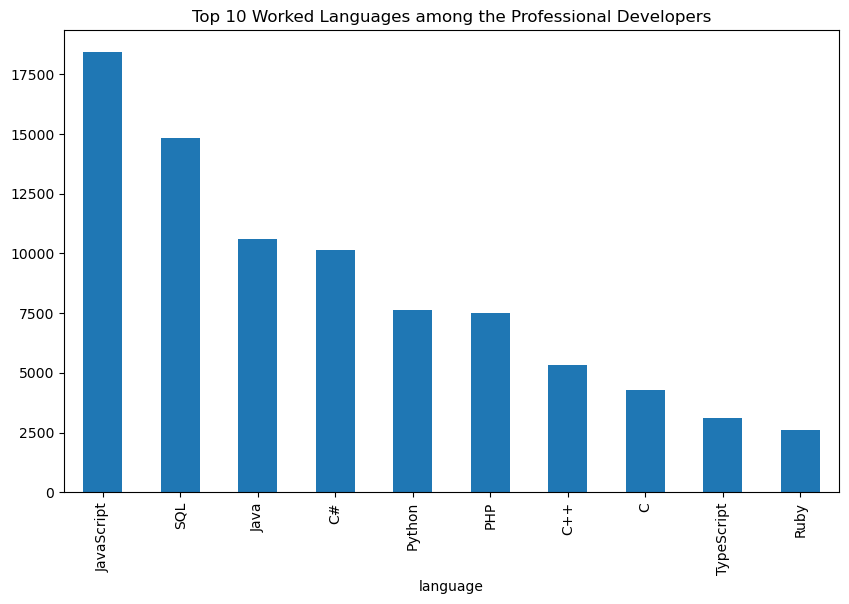

In [216]:
#top 10 language for developer 
languages = split_and_append(df_work)
all_languages=pd.DataFrame((x,languages.count(x)) for x in set(languages)) 
all_languages.rename(columns={0:"language",1:"count"},inplace=True) # setting up the column names
all_languages=all_languages.set_index("language") # setting up the index
all_languages.sort_values("count", ascending=False, inplace=True) # sort descending to see the top 10 languages
top_10_languages=all_languages[0:10] #only top 10 languages
top_10_languages.plot(kind='bar', legend=None, figsize=(10,6));
plt.title("Top 10 Worked Languages among the Professional Developers");
plt.show()

So JavaScript is the most popular programming language for the professional developers

In [82]:
# look at the Which of the following languages are mostly tended to be worked with in the future"
df_dev["WantWorkLanguage"].value_counts() 

JavaScript                                                                  518
C#; JavaScript; SQL                                                         417
Java                                                                        412
C#                                                                          382
C#; JavaScript; SQL; TypeScript                                             314
                                                                           ... 
CoffeeScript; Go; JavaScript; PHP; Python; Scala; SQL; Swift; TypeScript      1
Elixir; Erlang; JavaScript; Swift                                             1
Clojure; F#; Go; Java; JavaScript; Python; Ruby; Rust; Scala; SQL             1
CoffeeScript; Go; Java; JavaScript; Lua; R; SQL; Swift                        1
C#; Python; R; Ruby; Rust; Scala; TypeScript; VB.NET                          1
Name: WantWorkLanguage, Length: 8660, dtype: int64

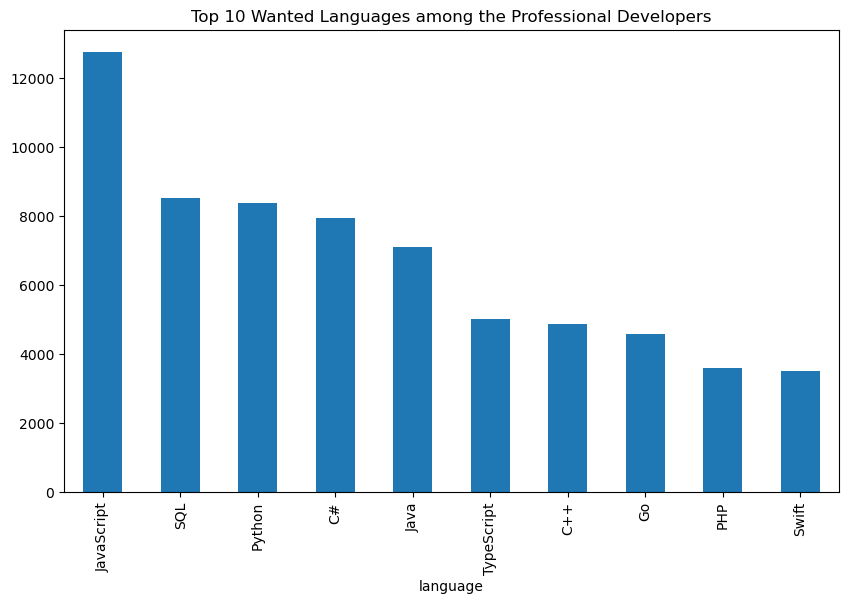

In [215]:
# By using the same function we have create earlier
# top 10 wanted language for developer 
df_want = df_dev["WantWorkLanguage"].dropna(axis=0)  # droping any null values

languages = split_and_append(df_want)
new_languages=pd.DataFrame((x,languages.count(x)) for x in set(languages)) 

new_languages.rename(columns={0:"language",1:"count"},inplace=True) # setting up the column names
new_languages=new_languages.set_index("language") # setting up the index
new_languages.sort_values("count", ascending=False, inplace=True) # sort descending to see the top 10 languages
top_10_languages_new=new_languages[0:10] #only top 10 languages
top_10_languages_new.plot(kind='bar', legend=None, figsize=(10,6));
plt.title("Top 10 Wanted Languages among the Professional Developers");
plt.show()

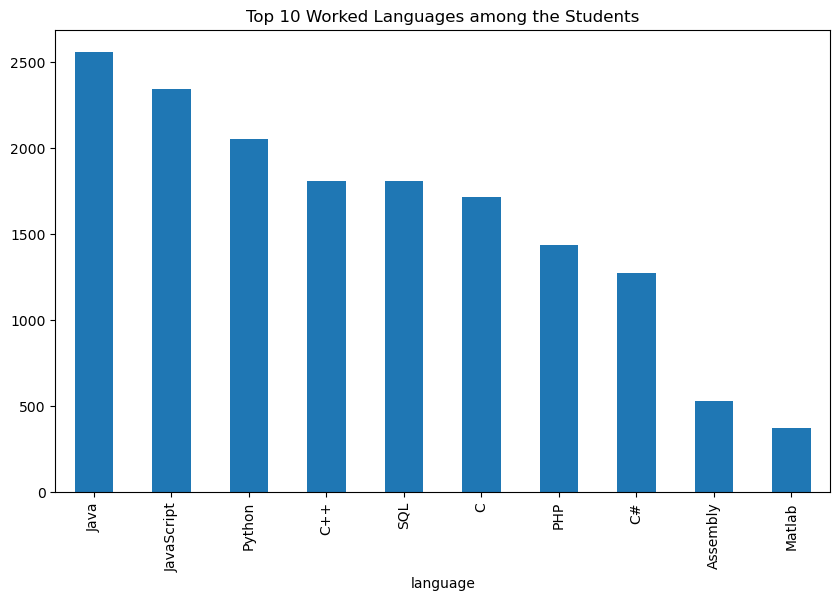

In [86]:
# top 10 language for student
df_stu = df_public[df_public["Professional"] == "Student"] 

df_work_stu = df_stu["HaveWorkedLanguage"].dropna(axis=0)
df_work_stu

languages_stu = split_and_append(df_work_stu)
all_languages_stu=pd.DataFrame((x,languages_stu.count(x)) for x in set(languages_stu)) 
all_languages_stu.rename(columns={0:"language",1:"count"},inplace=True) # setting up the column names
all_languages_stu=all_languages_stu.set_index("language") # setting up the index
all_languages_stu.sort_values("count", ascending=False, inplace=True) # sort descending to see the top 10 languages
top_10_languages_stu=all_languages_stu[0:10] #only top 10 languages
top_10_languages_stu.plot(kind='bar', legend=None, figsize=(10,6));
plt.title("Top 10 Worked Languages among the Students");
plt.show()

We could see for academic usage scenario, Java Python c++ and academic analysis language like Matlab are getting famous

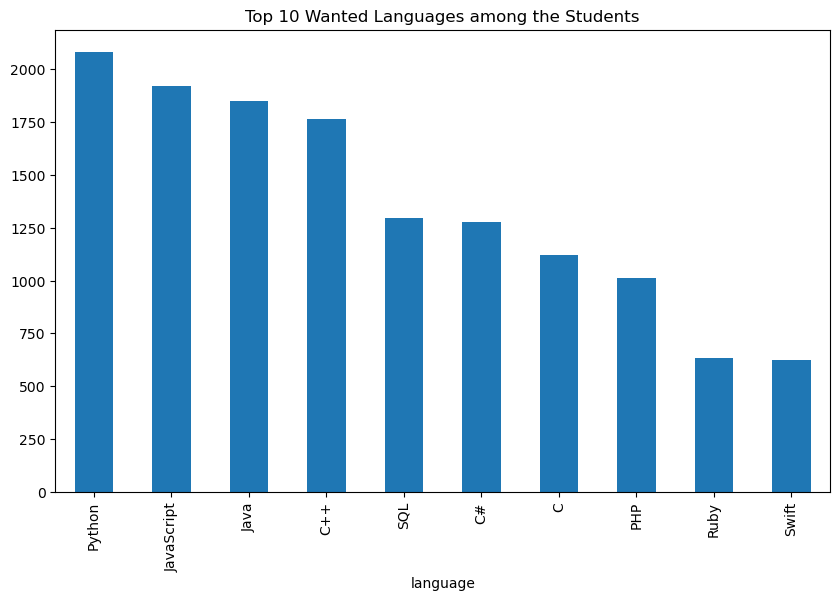

In [217]:
#top 10 wanted language for student
df_want_stu = df_stu["WantWorkLanguage"].dropna(axis=0)  # droping any null values

languages_stu = split_and_append(df_want_stu)
new_languages_stu=pd.DataFrame((x,languages_stu.count(x)) for x in set(languages)) 

new_languages_stu.rename(columns={0:"language",1:"count"},inplace=True) # setting up the column names
new_languages_stu=new_languages_stu.set_index("language") # setting up the index
new_languages_stu.sort_values("count", ascending=False, inplace=True) # sort descending to see the top 10 languages
top_10_languages_new_stu=new_languages_stu[0:10] #only top 10 languages
top_10_languages_new_stu.plot(kind='bar', legend=None, figsize=(10,6));
plt.title("Top 10 Wanted Languages among the Students");
plt.show()

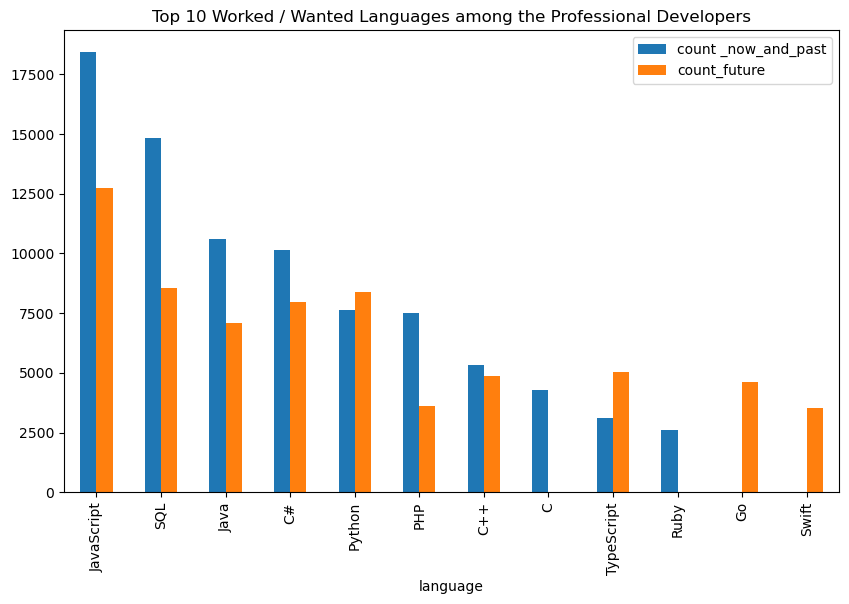

In [89]:
#comparing language for developer
x=top_10_languages.merge(top_10_languages_new, left_on='language', right_on='language', how="outer",  suffixes=(" _now_and_past", '_future'))
x.plot(kind='bar', legend=True, figsize=(10,6), label=["now","future"]);
plt.title("Top 10 Worked / Wanted Languages among the Professional Developers");
plt.show()


The JavaScript and SQL is still the most famous, Python and C# aregetting more famous, C and Ruby seems out of time in future

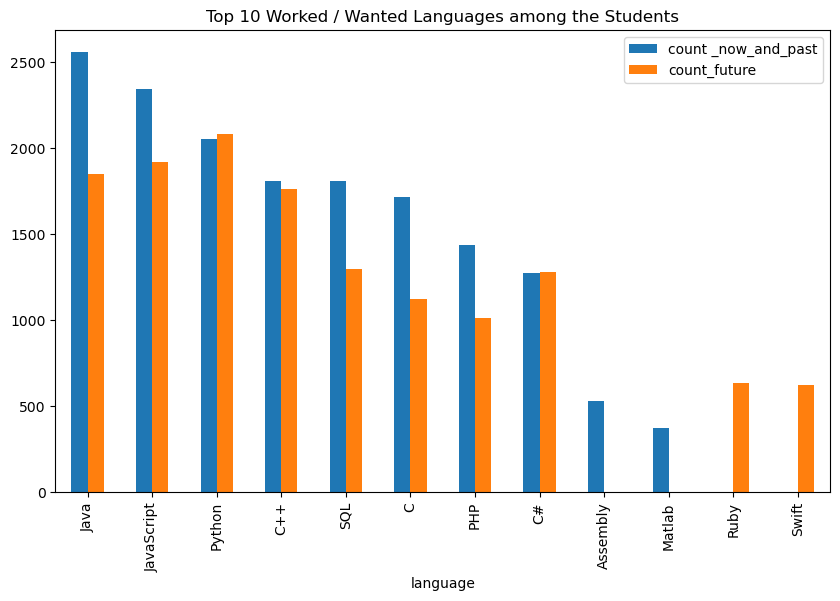

In [219]:
#comparing language for student
x=top_10_languages_stu.merge(top_10_languages_new_stu, left_on='language', right_on='language', how="outer",  suffixes=(" _now_and_past", '_future'))
x.plot(kind='bar', legend=True, figsize=(10,6), label=["now","future"]);
plt.title("Top 10 Worked / Wanted Languages among the Students");
plt.show()

Comparing to developers, for students, Python and Java is more famous. and we could also see academic languages like matlab are going out of top 10. Another highlight point is Swift now are getting more interested, for in both ladders it is concenred to be a wanted language in future

## 3. Is the developer’s salary related to their country, language type, degree or working period?

### Is the salary related to number of language?

In [92]:
#Filter only worked languages and Salary columns
df_work_sal = df_public[["HaveWorkedLanguage","Salary"]].dropna(axis=0) 
df_work_sal.reset_index(drop=True,inplace = True)
df_work_sal.head()

,HaveWorkedLanguage,Salary
0,Java; PHP; Python,113750.0
1,Assembly; C; C++,100000.0
2,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
3,Java,100764.0
4,Java; Scala,175000.0


In [93]:
#split the multiple languages for each respondent and count a number of languages
def split_and_count(x):
    temp_list=[]
    temp_list = x.split('; ')
    return len(temp_list)

df_work_sal["num_of_langs"] = df_work_sal.apply(lambda row: split_and_count(row['HaveWorkedLanguage']), axis=1)
df_work_sal.head()

df_work_sal

,HaveWorkedLanguage,Salary,num_of_langs
0,Java; PHP; Python,113750.000000,3
1,Assembly; C; C++,100000.000000,3
2,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.000000,7
3,Java,100764.000000,1
4,Java; Scala,175000.000000,2
...,...,...,...
12123,Go; JavaScript; Python,74193.548387,3
12124,JavaScript; Objective-C; Python; Swift,107526.881720,4
12125,C#; JavaScript; TypeScript,32258.064516,3
12126,C#; JavaScript; Python; SQL; VB.NET; VBA,58000.000000,6


In [94]:
# grouping by number of languages and taking the average salary per number of languages
df_num_lang =df_work_sal.groupby(["num_of_langs"]).mean()["Salary"] 
df_num_lang.head()

num_of_langs
1    53202.325036
2    57888.283987
3    55213.482484
4    58317.869749
5    59163.122613
Name: Salary, dtype: float64

<AxesSubplot:ylabel='num_of_langs'>

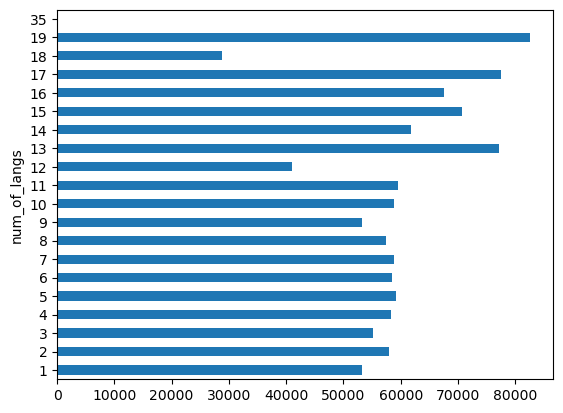

In [157]:
#plot (no idea why icefire_r not working, I give up)
df_num_lang.plot.barh(x='num_of_langs', y='Salary', rot=0)

Since, from the graph there is no strong increase or decrease of average salary per number of known languages. Lets check the Pearson Correlation

,Salary,num_of_langs
Salary,1.000000,0.023791
num_of_langs,0.023791,1.000000


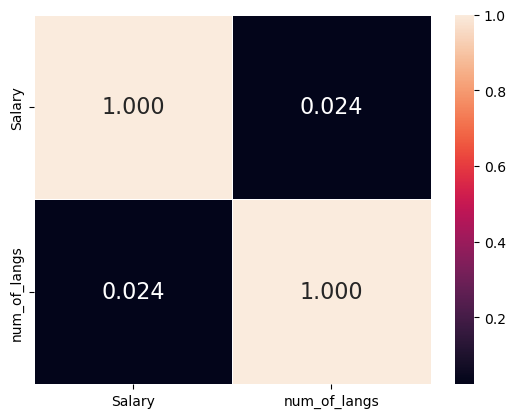

In [96]:
#correlation analysis
data = df_work_sal[["Salary","num_of_langs"]]
correlation = data.corr(method='pearson')

sb.heatmap(correlation, annot=True, fmt=".3f", linewidths=.5,annot_kws={'size':16})

correlation

The correlation is very low, that is: 2,4%. It means there is no clear correlation between Salary and number of languages known.

### Is the salary related to number of working year?

In [126]:
#same as above
df_work_period = df_public[["YearsProgram","Salary"]].dropna(axis=0) #Filter only worked languages and Salary columns
df_work_period.reset_index(drop=True,inplace = True)
df_work_period.head()

,YearsProgram,Salary
0,20 or more years,113750.0
1,20 or more years,100000.0
2,20 or more years,130000.0
3,2 to 3 years,82500.0
4,10 to 11 years,100764.0


In [127]:
#grouped
df_yop = df_work_period.groupby(['YearsProgram']).mean().reset_index()
df_yop[['YearsProgram', 'Salary']]

,YearsProgram,Salary
0,1 to 2 years,33952.955892
1,10 to 11 years,48056.752718
2,11 to 12 years,54866.916054
3,12 to 13 years,55753.347727
4,13 to 14 years,57149.324680
5,14 to 15 years,63487.522662
6,15 to 16 years,62791.031631
7,16 to 17 years,63898.935647
8,17 to 18 years,73085.731295
9,18 to 19 years,71599.061950


In [128]:
#creating a column for working year sorting in ploting 
df_yop['YearsWorking'] = df_yop['YearsProgram'].apply(lambda x: 0 if x == 'Less than a year'
                                      else (1 if x == '1 to 2 years'
                                      else 2 if x == '2 to 3 years'
                                      else 3 if x == '3 to 4 years'
                                      else 4 if x == '4 to 5 years'
                                      else 5 if x == '5 to 6 years'                                            
                                      else 6 if x == '6 to 7 years'
                                      else 7 if x == '7 to 8 years'                                            
                                      else 8 if x == '8 to 9 years'
                                      else 9 if x == '9 to 10 years'                                            
                                      else 10 if x == '10 to 11 years'
                                      else 11 if x == '11 to 12 years'                                            
                                      else 12 if x == '12 to 13 years'
                                      else 13 if x == '13 to 14 years'                                            
                                      else 14 if x == '14 to 15 years'
                                      else 15 if x == '15 to 16 years'                                            
                                      else 16 if x == '16 to 17 years'
                                      else 17 if x == '17 to 18 years'                                            
                                      else 18 if x == '18 to 19 years'
                                      else 19 if x == '19 to 20 years'                                                                                  
                                      else 20))
df_yop.sort_values("YearsWorking", ascending=False, inplace=True) # sort descending to see the top 10 languages
df_yop

,YearsProgram,Salary,YearsWorking
0,1 to 2 years,33952.955892,1
1,10 to 11 years,48056.752718,10
2,11 to 12 years,54866.916054,11
3,12 to 13 years,55753.347727,12
4,13 to 14 years,57149.324680,13
5,14 to 15 years,63487.522662,14
6,15 to 16 years,62791.031631,15
7,16 to 17 years,63898.935647,16
8,17 to 18 years,73085.731295,17
9,18 to 19 years,71599.061950,18


<AxesSubplot:ylabel='YearsWorking'>

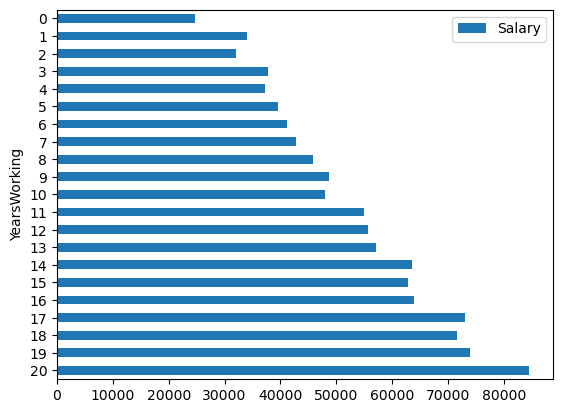

In [132]:
#barh chart, icefire still not working
df_yop.plot.barh(x='YearsWorking', y='Salary', rot=0)

hmm.. seems in good corelation

,Salary,YearsWorking
Salary,1.000000,0.985458
YearsWorking,0.985458,1.000000


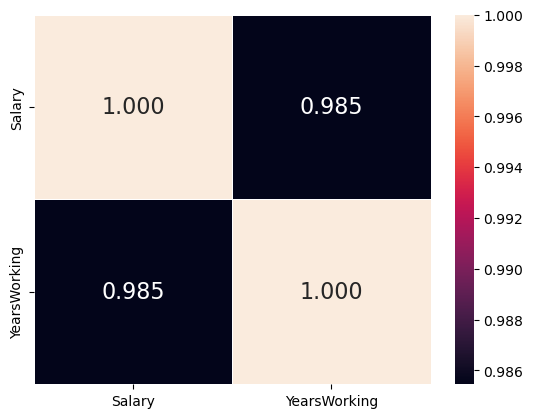

In [135]:
data = df_yop[["Salary","YearsWorking"]]
correlation = data.corr(method='pearson')

# Sample figsize in inches
sb.heatmap(correlation, annot=True, fmt=".3f", linewidths=.5,annot_kws={'size':16})

correlation

As the correlation shows, working year is linearly dependent with salary. It perhaps means to be a code writer you will have a un-limited salary expect if you could keep studying.

### Is the salary related to country?

In [159]:
df_salary= df_public.dropna(subset=['Salary'])
df_salary['Professional'].value_counts()

In [174]:
top20=df_salary['Country'].value_counts().head(20)
top20

United States         3781
United Kingdom        1386
Germany                994
India                  821
Canada                 667
France                 477
Poland                 317
Spain                  278
Australia              256
Brazil                 237
Netherlands            216
Italy                  201
Russian Federation     198
Sweden                 195
Israel                 151
Switzerland            150
Austria                132
Romania                121
South Africa           106
Mexico                  96
Name: Country, dtype: int64

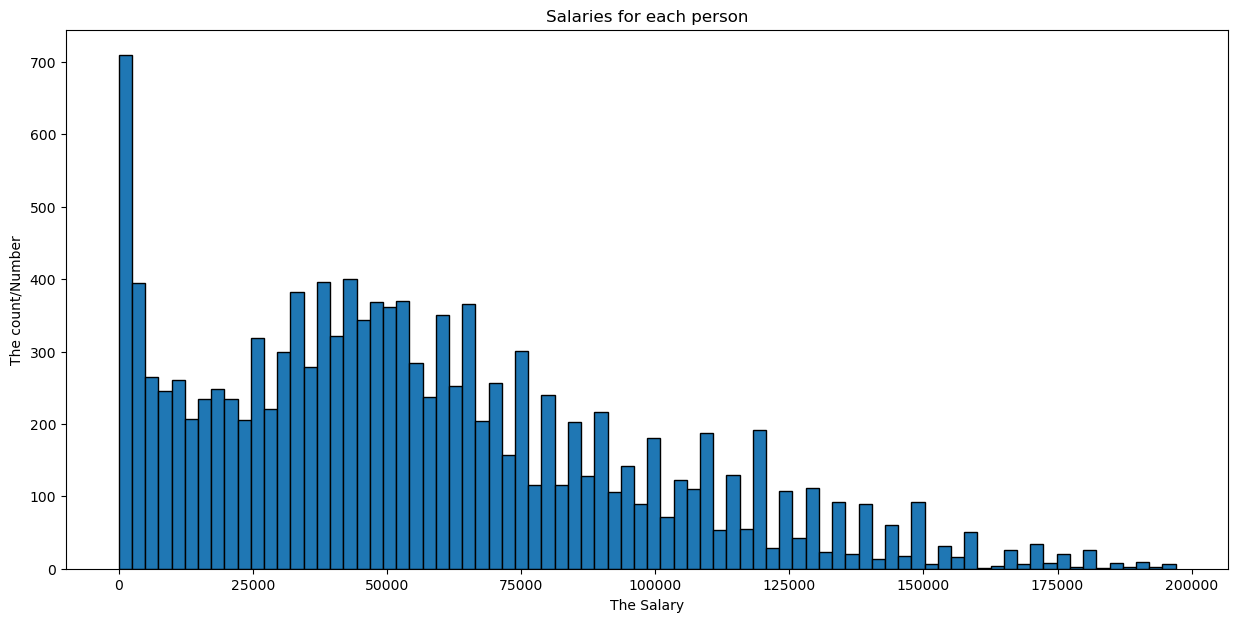

In [163]:
plt.figure(figsize=(15,7))
plt.hist(df_salary['Salary'], bins= 80, edgecolor='black');
plt.title('Salaries for each person')
plt.xlabel('The Salary')
plt.ylabel('The count/Number')
plt.show()

In [216]:
#Country and expect salaries
dek=df_salary.groupby(['Country'])['Salary'].mean().reset_index()
dek.sort_values("Salary", ascending=False, inplace=True)
dek.head(20)

,Country,Salary
132,Virgin Islands (USA),175000.000000
13,Bermuda,150000.000000
122,U.S. Minor Outlying Islands,136000.000000
123,Uganda,120000.000000
61,Kuwait,115200.000000
2,Anguilla,100000.000000
127,United States,96194.754635
66,Liechtenstein,93766.666667
114,Switzerland,91189.692616
49,Iceland,80645.161290


Simply speaking, obviously countries could affect developers' salary, but also depending on many other factors. Today, I would not go deep analysing in this topic.

### Is the salary related to degrees?

In [137]:
#same as above
df_edu_sal = df_public[["FormalEducation","Salary"]].dropna(axis=0) #Filter only worked languages and Salary columns
df_edu_sal.reset_index(drop=True,inplace = True)
grouped_df = df_edu_sal.groupby(["FormalEducation"]).mean().reset_index()
grouped_df

,FormalEducation,Salary
0,Bachelor's degree,56914.358553
1,Doctoral degree,78527.933053
2,I never completed any formal education,44430.660621
3,I prefer not to answer,38284.836141
4,Master's degree,58250.838766
5,Primary/elementary school,62677.337356
6,Professional degree,39503.658863
7,Secondary school,40395.148419
8,Some college/university study without earning ...,55912.810459


<AxesSubplot:ylabel='FormalEducation'>

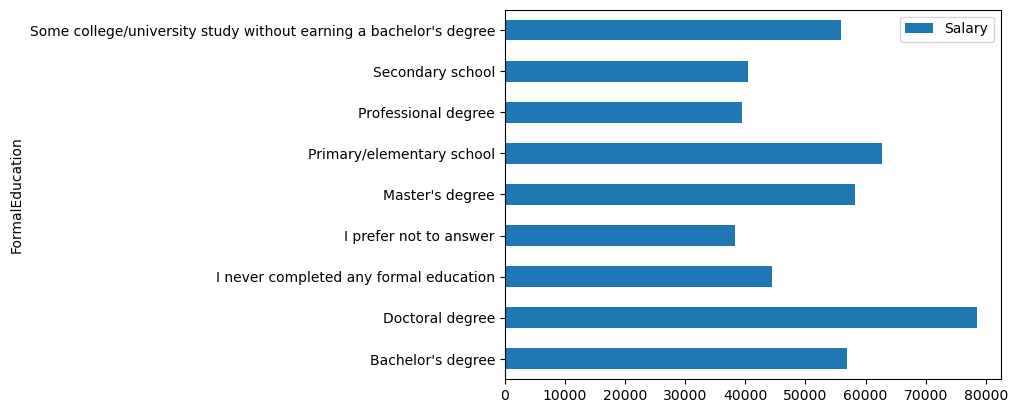

In [139]:
#same as above
grouped_df.plot.barh(x='FormalEducation', y='Salary', rot=0)

We could see that people with college education (PhD, Master or Bachelor) are expected to achieve higher salaries, but also their is an abnormal data "primary school", which main caused by varies reasons. To get a more deep understanding why such a data comes out, we may go deep to find what causes this by deep diving in this dataset or find reasons from other relative data.

## 4. Is the salary related to their activity level on Stack Overflow?

In [158]:
#pick up answers relative in responders stackoverflow using behavior.
columns_activity = ['StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 
                    'StackOverflowJobListing', 'StackOverflowCompanyPage', 
                    'StackOverflowJobSearch', 'StackOverflowNewQuestion', 
                    'StackOverflowAnswer', 'StackOverflowMetaChat']

data_type = {}
for col in columns_activity:
    data_type[col] = df_public[col].unique()

data_type

{'StackOverflowFoundAnswer': array(['At least once each week', 'Several times', 'Once or twice', nan,
        'At least once each day', "Haven't done at all"], dtype=object),
 'StackOverflowCopiedCode': array(["Haven't done at all", 'Several times', nan, 'Once or twice',
        'At least once each week', 'At least once each day'], dtype=object),
 'StackOverflowJobListing': array(['Once or twice', "Haven't done at all", 'At least once each week',
        nan, 'Several times', 'At least once each day'], dtype=object),
 'StackOverflowCompanyPage': array(["Haven't done at all", 'Once or twice', 'Several times', nan,
        'At least once each week', 'At least once each day'], dtype=object),
 'StackOverflowJobSearch': array(["Haven't done at all", 'Once or twice', 'At least once each week',
        nan, 'Several times', 'At least once each day'], dtype=object),
 'StackOverflowNewQuestion': array(['Several times', "Haven't done at all", nan, 'Once or twice',
        'At least once each wee

In [178]:
#quantization the answers
activity_dict = {"Haven't done at all": 1, "Once or twice": 2, "Several times": 3, 
                "At least once each week": 4, "At least once each day": 5}

activity_df = df_public[columns_activity].copy()
for col in columns_activity:
    activity_df[col].replace(activity_dict, inplace=True)
activity_df.fillna(0, axis=0, inplace=True) 

# Adding the Salary column in df1 to activity_df
activity_df['Salary'] = df_public['Salary']
activity_df.head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Salary
0,4.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,NaN
1,3.0,3.0,2.0,2.0,2.0,1.0,3.0,4.0,NaN
2,2.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,113750.0
3,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [174]:
# View the proportion of missing values and the number of rows without missing data in the column of Salary
print(activity_df['Salary'].isnull().mean())
print(activity_df['Salary'].notnull().sum())

0.7491632938978829
12891


In [188]:
# Delete rows with missing values in the Salary column.
activity_dropna = activity_df.dropna()
activity_dropna

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Salary
2,2.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,113750.000000
14,3.0,2.0,3.0,3.0,3.0,2.0,5.0,3.0,100000.000000
17,4.0,4.0,2.0,1.0,1.0,4.0,4.0,1.0,130000.000000
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82500.000000
22,5.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,100764.000000
...,...,...,...,...,...,...,...,...,...
51371,5.0,1.0,3.0,4.0,4.0,1.0,1.0,1.0,74193.548387
51378,5.0,3.0,1.0,3.0,1.0,5.0,5.0,3.0,107526.881720
51382,4.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,32258.064516
51387,3.0,1.0,4.0,4.0,4.0,2.0,1.0,1.0,58000.000000


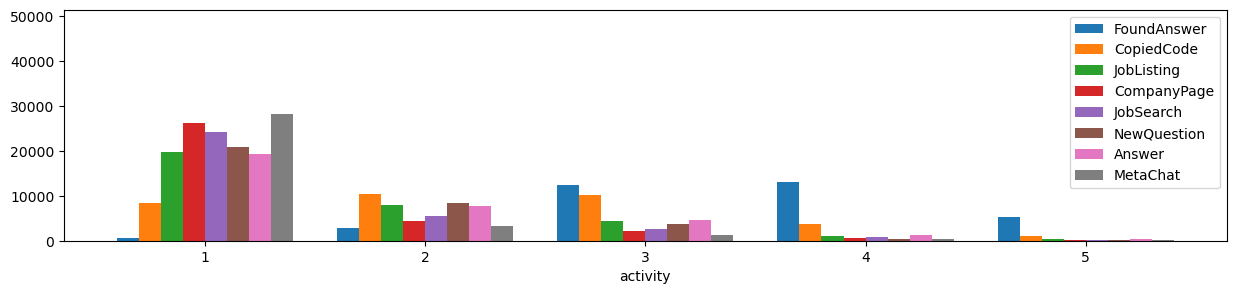

In [179]:
# Draw three histograms of the 8 types of behavioral activity .
plt.figure(2, figsize=[15,3])
plt.hist(activity_df[columns_activity[0:8]], bins=5,range=[0.5, 5.5])
plt.ylim([0,51392])
plt.xlabel('activity')
plt.legend(['FoundAnswer', 'CopiedCode','JobListing', 'CompanyPage', 'JobSearch','NewQuestion', 'Answer', 'MetaChat'])
plt.show()

<AxesSubplot:>

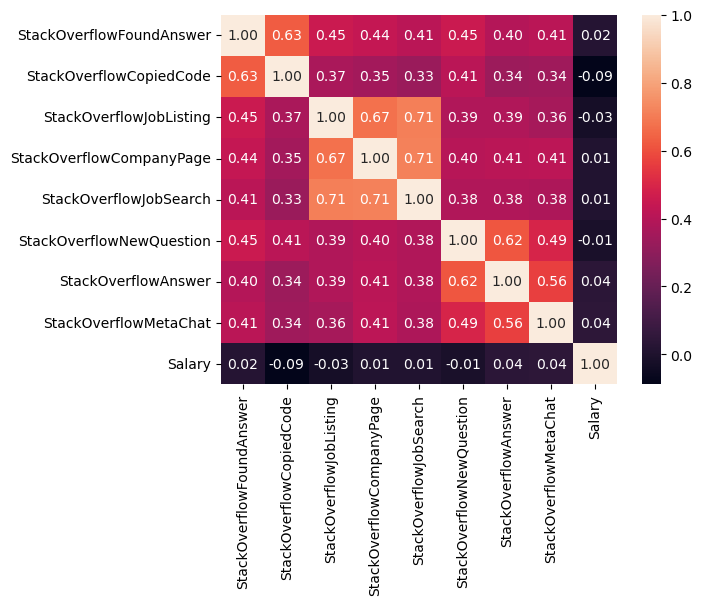

In [176]:
sb.heatmap(activity_dropna.corr(), annot=True, fmt=".2f")

Unfortunately it seems noun of these factors has effect with salaries. The highest is just 0.09. But we could try to combining them in ML models to see whether we could have a better result.

In [190]:
#firstly trying a LR model
X = activity_dropna[['StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 'StackOverflowJobListing', 'StackOverflowCompanyPage', 'StackOverflowJobSearch', 'StackOverflowNewQuestion', 'StackOverflowAnswer', 'StackOverflowMetaChat']]
y = activity_dropna['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

C:\Users\eros3\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [193]:
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.
print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.01645879380819326
1523840692.1104562


It seems the r2 score is too low which means only 1.6% of the samples fitted the model. So I am trying another method for modelling.

In [194]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,24691.358025,64642.658659,-39951.300634
1,31250.000000,62645.584267,-31395.584267
2,118279.569892,66338.858769,51940.711124
3,48387.096774,54468.634504,-6081.537730
4,21505.376344,57220.361811,-35714.985467


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elaps

[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parall

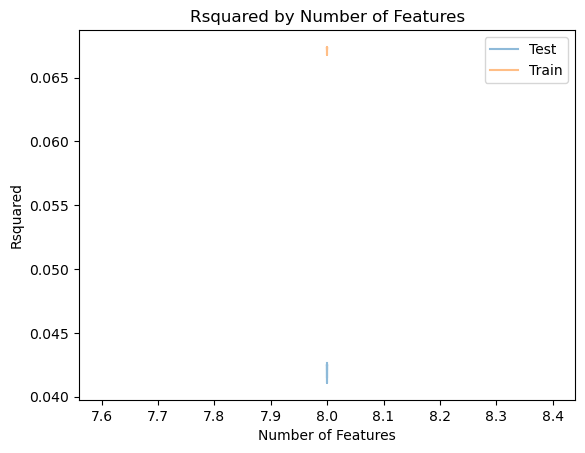

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


In [210]:
# Let's try another random forest model with cutoffs, and test whether it will be better?

cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
params = {'n_estimators': [10, 100, 1000], 'max_depth': [1, 5, 10, 100]}


test_size = .30, 
random_state=42

r2_score_test, r2_score_train, num_feats, results = [], [], [], dict()
for cutoff in cutoffs:

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model and obtain pred response
    if param_grid==None:
        rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

    else:
        rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
        rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
            
    rf_model.fit(X_train, y_train)
    y_test_preds = rf_model.predict(X_test)
    y_train_preds = rf_model.predict(X_train)

   #append the r2 value from the test set
    r2_scores_test.append(r2_score(y_test, y_test_preds))
    r2_scores_train.append(r2_score(y_train, y_train_preds))
    results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
best_cutoff = max(results, key=results.get)

#reduce X matrix
reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
num_feats.append(reduce_X.shape[1])

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

#fit the model
rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
rf_model.fit(X_train, y_train)



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.1s finished


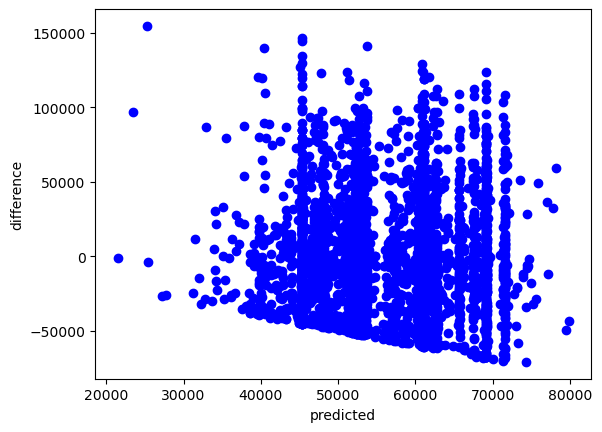

In [211]:
y_test_preds = rf_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [213]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)

coefs_df.sort_values('abs_coefs', ascending=False).head(20)

,est_int,coefs,abs_coefs
1,StackOverflowCopiedCode,-5828.162092,5828.162092
0,StackOverflowFoundAnswer,3549.611009,3549.611009
6,StackOverflowAnswer,2937.508843,2937.508843
2,StackOverflowJobListing,-2773.342700,2773.342700
7,StackOverflowMetaChat,2369.695924,2369.695924
5,StackOverflowNewQuestion,-2244.737422,2244.737422
3,StackOverflowCompanyPage,1349.339465,1349.339465
4,StackOverflowJobSearch,777.380268,777.380268


In [214]:
print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.042351916299137926
1483723416.444624


By using random forest, the R2 score increased, but still too low, which means the prediction model still not working. Such a result could caused by many reasons, in my opinion, I think such a result could lead me to make a brief conclusion that the activity level of user in StackOverFlow has really correlation with their salary level.  

# Result Evaluation & Deployment:

In this project we are trying to answer 4 business questions, and we have answers as following:
    
1. Description of the respondents, where they are and who they are?

A: The users are mainly English speaking code writers using StackOverFlow. They are mainly developers, students and non-developer code writers.

2. What are the top known languages, top wanted languages among the professional developers and students?

A: For developers and students, languages they use are different. Developers use JSP and SQL more, and students prefer Java and Python more.
  We could see python and swift is drawing more attention in future, and old school languages like C and matlab are about to go out-of-time.  

3. Is the developers' salary related to their country, number of languages, degree, working period?

A: The factor developers' salary should be a very complex question, here we just make simple test for simple purpose. 
  According to our test, working period and countries indeed are related to their salary. We could also see that people with college education (PhD, Master or Bachelor) are expected to achieve higher salaries, but also their is an abnormal data "primary school", which main caused by varies reasons for further studies. number of languages has no effect with salary.

4. A tempt of use linear regression and random forest to test whether StackOverFlow activity level could affect salary.

A: We try to use several method to predict salary by using activity related columns, but the result shows may salary are not affected by these factors.
But we should mentioned that, there are 153 questions in schema, which means if we could use all of this data for predict, the model could be powerful enough to find several methods to predict the salary by giving some of the factors. But we need to pick up good factors and ML models based on experience and analysis, and also need to be care of overfitting and data biasis. 